# Linear Regression:
**Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).** 

### Implementation of linear regression model:

In [1]:
#prepare the environment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import sklearn
pd.show_versions()
#matplotlib.__version__
sklearn.__version__





INSTALLED VERSIONS
------------------
commit: None
python: 3.7.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 15 Stepping 13, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 5.0.1
pip: 19.1.1
setuptools: 41.0.1
Cython: 0.29.12
numpy: 1.16.4
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.6.1
sphinx: 2.1.2
patsy: 0.5.1
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: 1.2.1
tables: 3.5.2
numexpr: 2.6.9
feather: None
matplotlib: 3.1.0
openpyxl: 2.6.2
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.8
lxml.etree: 4.3.4
bs4: 4.7.1
html5lib: 1.0.1
sqlalchemy: 1.3.5
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'0.21.2'

In [2]:
#load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(type(boston_dataset))



<class 'sklearn.utils.Bunch'>


In [3]:
#explore the data
print(boston_dataset.keys())
print(boston_dataset['feature_names'])
print(boston_dataset['DESCR'])



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

In [4]:
#prepare the data
from sklearn.model_selection import train_test_split
num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test = train_test_split(boston_dataset.data[:,5].reshape(-1,1), boston_dataset.target.reshape(-1,1))
print(num_Rooms_Train.shape)
print(med_price_Train.shape)
print(num_Rooms_Test.shape)
print(num_Rooms_Test[0])



(379, 1)
(379, 1)
(127, 1)
[5.884]


In [5]:
#implement linear regression model
from sklearn.linear_model import LinearRegression
price_room = LinearRegression()
print(type(price_room))
price_room.fit (num_Rooms_Train,med_price_Train)


<class 'sklearn.linear_model.base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#predict on linear regression model

#print(price_room.predict(num_Rooms_Test[0].reshape(-1,1)))
print(price_room.predict(np.array([7.564,3.543,2.450]).reshape(-1,1)))
#print(num_Rooms_Test[0])
#print([7.564])
print(price_room.predict(num_Rooms_Test[5].reshape(-1,1)))
print(price_room.predict(num_Rooms_Test[1:10]))
med_price_pred = price_room.predict(num_Rooms_Test)      


[[ 34.44812696]
 [ -3.18468977]
 [-13.41415227]]
[[15.69255254]]
[[21.33607119]
 [30.8355263 ]
 [21.61684326]
 [24.84572209]
 [15.69255254]
 [29.30063897]
 [17.06833569]
 [24.59302723]
 [17.77962494]]


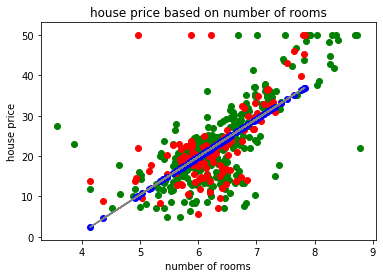

In [7]:
#Let's graph it:
#num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test

import matplotlib.pyplot as plt
plt.scatter(num_Rooms_Train, med_price_Train, color = 'green')
plt.scatter(num_Rooms_Test, med_Price_Test, color = 'red')   
plt.scatter(num_Rooms_Test, med_price_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(num_Rooms_Test, price_room.predict(num_Rooms_Test), color = 'gray')
plt.title('house price based on number of rooms')
plt.xlabel('number of rooms')
plt.ylabel('house price')
plt.show()

